In [11]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
PATH='../input/merged/'

In [6]:
acorn_df = pd.read_csv('{0}acorn_details.csv'.format(PATH))

In [7]:
acorn_df.head(n=100)

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
5,POPULATION,Age,Age 50-64,124.0,121.0,120.0,72.0,82.0,126.0,109.0,107.0,112.0,90.0,41.0,95.0,96.0,103.0,89.0,78.0,89.0
6,POPULATION,Age,Aged 65-74,125.0,120.0,152.0,55.0,61.0,144.0,108.0,104.0,182.0,72.0,29.0,91.0,93.0,125.0,73.0,59.0,76.0
7,POPULATION,Age,Aged 75 plus,112.0,103.0,157.0,49.0,57.0,117.0,98.0,96.0,220.0,66.0,32.0,87.0,96.0,152.0,72.0,56.0,76.0
8,POPULATION,Geography,England,107.0,101.0,103.0,114.0,106.0,75.0,107.0,106.0,102.0,106.0,95.0,93.0,97.0,89.0,97.0,110.0,97.0
9,POPULATION,Geography,Northern Ireland,30.0,95.0,45.0,2.0,49.0,462.0,53.0,104.0,30.0,91.0,56.0,87.0,131.0,67.0,95.0,75.0,43.0


In [19]:
main_cats = set(acorn_df['MAIN CATEGORIES'])

In [20]:
for main_cat in main_cats:
    mcat_df = acorn_df.loc[acorn_df['MAIN CATEGORIES'] == main_cat]
    print('Main Category: {0}'.format(main_cat))
    cats = set(mcat_df['CATEGORIES'])
    print('    {0}'.format(cats))

Main Category: HOUSING
    {'House Size', 'House Tenure', 'Moving House', 'House Value', 'House Type'}
Main Category: TRANSPORT
    {'Public Transport Accessibility Level', 'Main Car Class', 'Travel To Work', 'Car Ownership'}
Main Category: FAMILY
    {'Household Size', 'Children in household', 'Structure'}
Main Category: SHOPPING
    {'Food Shopping', 'Clothing & Footwear Stores', 'Electrical Stores', 'High Street Retailers', 'Preferred Supermarket', 'Attitudes', 'Furniture & Fittings Stores'}
Main Category: COMMUNITY SAFETY
    {'Crime Survey for England'}
Main Category: ENVIRONMENT
    {'Environmental Groups', 'Attitude', 'Action'}
Main Category: ECONOMY
    {'NS Socio-Economic Classifications', 'Social Grade', 'Economic Activity', 'Occupation'}
Main Category: HEALTH
    {'Behaviours & Lifestyle'}
Main Category: CONTACT
    {'Preferred Channel'}
Main Category: DIGITAL
    {'Digital Attitudes', 'TV on Demand', 'Types of internet usage : Tablet / iPad', 'Number of apps on mobile phone

Housing is an obvious category of relevance

In [21]:
housing_df = acorn_df.loc[acorn_df['MAIN CATEGORIES'] == 'HOUSING']

In [22]:
housing_df.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
35,HOUSING,House Type,Bungalow,118.0,100.0,198.0,51.0,51.0,167.0,94.0,74.0,410.0,55.0,61.0,64.0,64.0,64.0,45.0,50.0,50.0
36,HOUSING,House Type,Detached house,431.0,419.0,229.0,46.0,98.0,287.0,203.0,59.0,138.0,61.0,38.0,32.0,25.0,24.0,20.0,19.0,13.0
37,HOUSING,House Type,Flat or maisonette,36.0,25.0,47.0,274.0,196.0,17.0,22.0,17.0,54.0,30.0,299.0,49.0,29.0,159.0,160.0,142.0,277.0
38,HOUSING,House Type,Semi-detached house,56.0,70.0,139.0,36.0,66.0,119.0,96.0,192.0,172.0,102.0,33.0,72.0,139.0,125.0,39.0,92.0,52.0
39,HOUSING,House Type,Terraced house,23.0,20.0,25.0,86.0,77.0,38.0,103.0,71.0,31.0,163.0,77.0,199.0,140.0,72.0,169.0,123.0,83.0


In [23]:
h = housing_df.T

In [24]:
h.head()


,35,36,37,38,39,40,41,42,43,44,...,49,50,51,52,53,54,55,56,57,58
MAIN CATEGORIES,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,...,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING,HOUSING
CATEGORIES,House Type,House Type,House Type,House Type,House Type,House Tenure,House Tenure,House Tenure,House Tenure,House Tenure,...,House Size,House Size,House Value,House Value,House Value,House Value,House Value,House Value,House Value,Moving House
REFERENCE,Bungalow,Detached house,Flat or maisonette,Semi-detached house,Terraced house,Owner occupied,Owned outright,Mortgaged,Privately rented,Social renting,...,Number of Beds : 4,Number of Beds : 5 plus,House Value up to 100k,House Value 100k-150k,House Value 150k-250k,House Value 250k-500k,House Value 500k-750k,House Value 750k-1m,House Value 1m+,Individual likely to move within 12 months
ACORN-A,118,431,36,56,23,152,178,127,58,12,...,302,838,13,35,42,76,111,156,1805,71
ACORN-B,100,419,25,70,20,155,160,151,53,10,...,348,329,17,32,66,161,268,317,124,80


In [46]:
bungalow=h[35][3:]
detached = h[36][3:]
flat = h[37][3:]
semi_detached = h[38][3:]
terraced = h[39][3:]

In [60]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 4

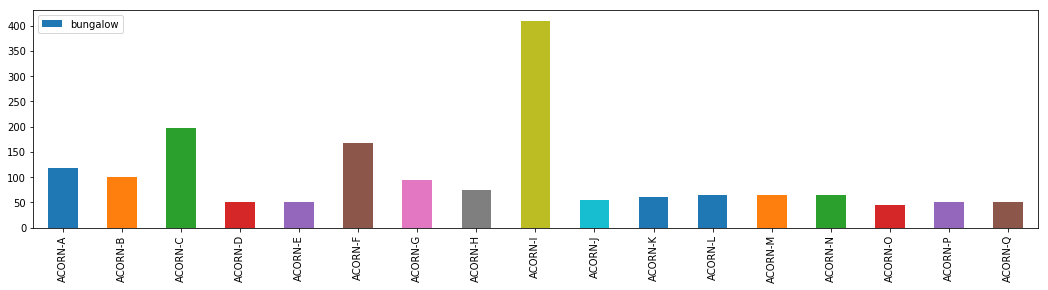

In [61]:
bung.plot.bar(label='bungalow')
#detached.plot.bar(label='detached')
#flat.plot.bar(label='flat')
#semi_detached.plot.bar(label='semi_detached')
#terraced.plot.bar(label='terraced')
plt.legend(loc='upper left')

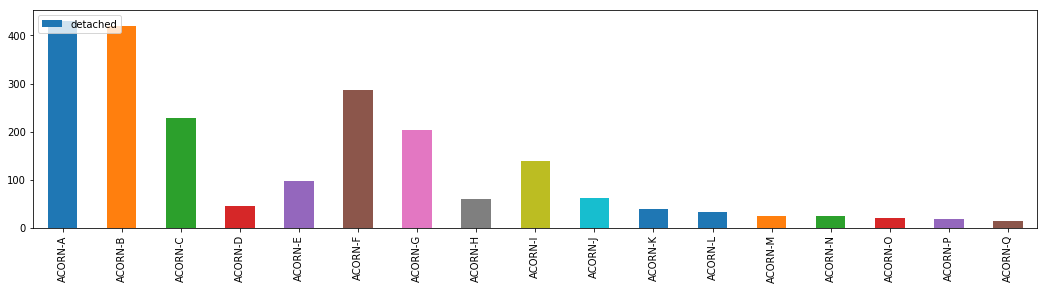

In [63]:
detached.plot.bar(label='detached')
plt.legend(loc='upper left')

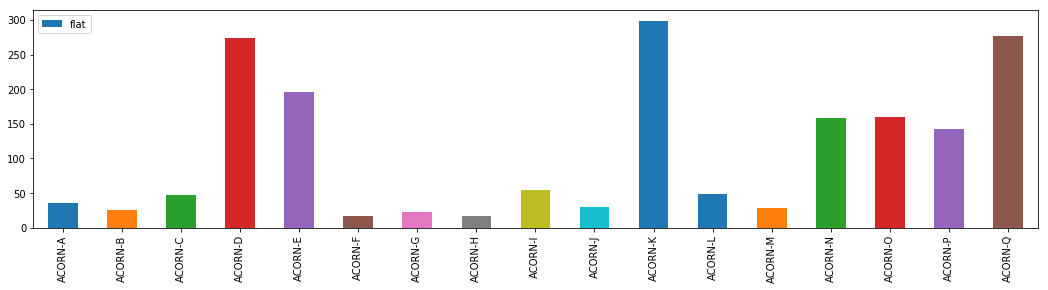

In [64]:
flat.plot.bar(label='flat')
plt.legend(loc='upper left')

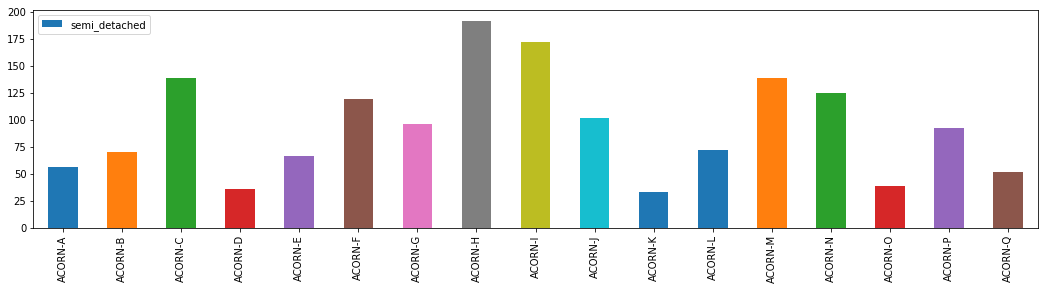

In [65]:
semi_detached.plot.bar(label='semi_detached')
plt.legend(loc='upper left')

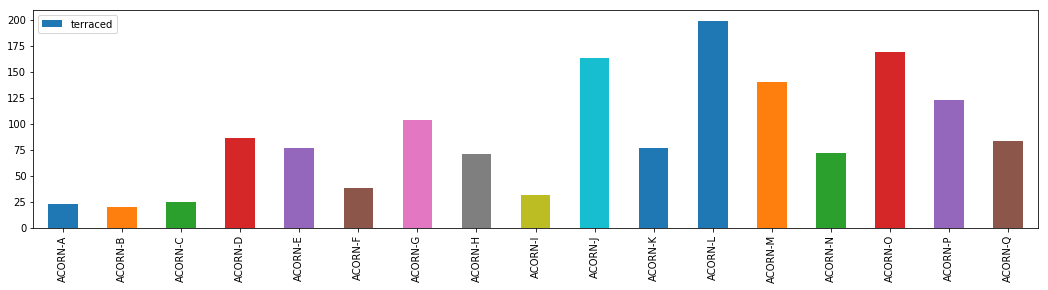

In [66]:
terraced.plot.bar(label='terraced')
plt.legend(loc='upper left')

In [71]:
population_df = acorn_df.loc[acorn_df['MAIN CATEGORIES'] == 'POPULATION']

In [72]:
p = population_df.T

In [74]:
p.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
MAIN CATEGORIES,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,...,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION
CATEGORIES,Age,Age,Age,Age,Age,Age,Age,Age,Geography,Geography,...,Country of Birth,Country of Birth,Country of Birth,Religion,Religion,Religion,Religion,Religion,Religion,Religion
REFERENCE,Age 0-4,Age 5-17,Age 18-24,Age 25-34,Age 35-49,Age 50-64,Aged 65-74,Aged 75 plus,England,Northern Ireland,...,South America,Caribbean,Antarctica & Oceania,Christian,Jewish,Buddhist,Muslim,Hindu,Sikh,Other religion
ACORN-A,77,117,64,52,102,124,125,112,107,30,...,170,47,249,104,751,95,65,162,142,86
ACORN-B,83,109,73,63,105,121,120,103,101,95,...,64,38,104,109,174,74,44,91,100,92


In [75]:
family_df = acorn_df.loc[acorn_df['MAIN CATEGORIES'] == 'FAMILY']

In [77]:
f = family_df.T
f.head()

,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
MAIN CATEGORIES,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY,FAMILY
CATEGORIES,Structure,Structure,Structure,Structure,Structure,Structure,Structure,Children in household,Children in household,Children in household,Children in household,Household Size,Household Size,Household Size,Household Size
REFERENCE,Couple family no children,Couple family with dependent children,Lone parent family with dependent children,All pensioner households,All student households,One person household (non-pensioner),Other household structure,Children at home : 0,Children at home : 1,Children at home : 2,Children at home : 3+,Household size : 1 person,Household size : 2 persons,Household size : 3-4 persons,Household size : 5+ persons
ACORN-A,112,146,30,119,16,57,86,106,84,103,68,48,107,114,128
ACORN-B,124,140,48,105,23,59,87,101,88,118,76,51,107,119,104


In [78]:
finance_df = acorn_df.loc[acorn_df['MAIN CATEGORIES'] == 'FINANCE']

In [80]:
fi = finance_df.T
fi.head()

,186,187,188,189,190,191,192,193,194,195,...,270,271,272,273,274,275,276,277,278,279
MAIN CATEGORIES,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,...,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE,FINANCE
CATEGORIES,Household Annual Income,Household Annual Income,Household Annual Income,Household Annual Income,Household Annual Income,Household Annual Income,Household Annual Income,Financial Attitudes,Financial Attitudes,Financial Attitudes,...,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week,Expenditure per person per week
REFERENCE,"�0-�20,000","�20,000-�40,000","�40,000-�60,000","�60,000-�80,000","�80,000-�100,000","�100,000+",Average Household Income,I don't like the idea of being in debt,I am very good at managing money,It is important to be well insured for everything,...,"Housing, water, electricity, gas and other fuels","Furnishings, household equipment and routine m...",Health,Transport,Communication,Recreation and Culture,Education,Restaurants and hotels,Miscellaneous goods and services,Total Online Expenditure
ACORN-A,19,49,112,200,304,511,195,105,115,114,...,85,144,139,138,104,132,177,125,139,141
ACORN-B,30,69,127,189,247,332,163,105,119,115,...,69,132,130,134,102,126,149,120,127,136


In [81]:
very_low_income=fi[186][3:]
low_income = fi[187][3:]
low_med_income = fi[188][3:]
med_income = fi[189][3:]
high_income = fi[190][3:]
very_high_income = fi[191][3:]

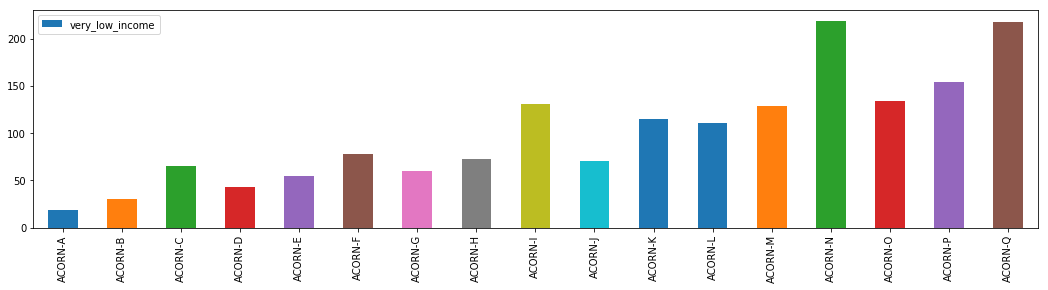

In [82]:
very_low_income.plot.bar(label='very_low_income')
plt.legend(loc='upper left')

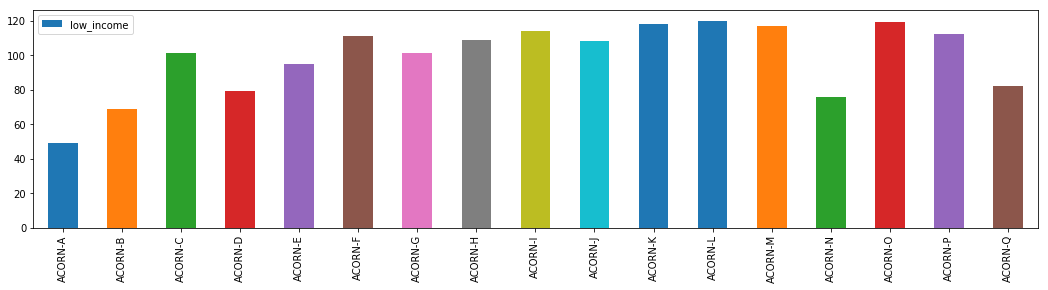

In [83]:
low_income.plot.bar(label='low_income')
plt.legend(loc='upper left')

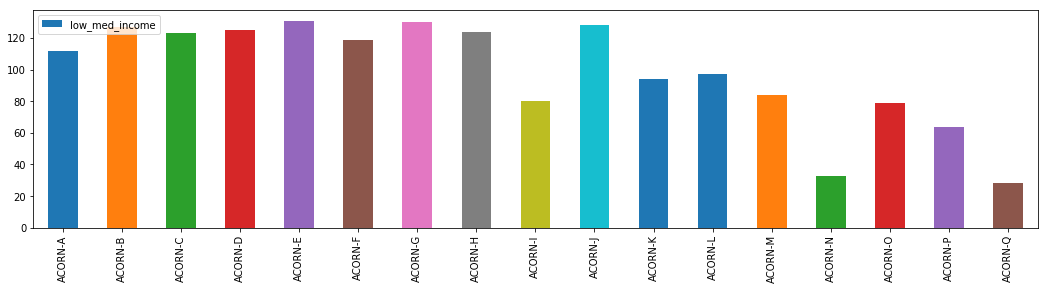

In [84]:
low_med_income.plot.bar(label='low_med_income')
plt.legend(loc='upper left')

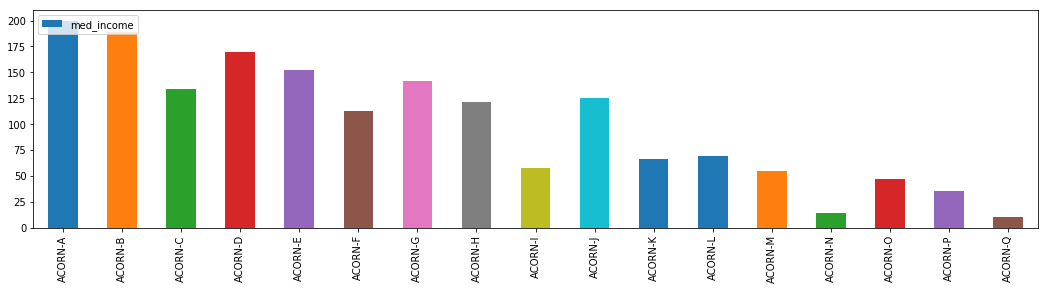

In [85]:
med_income.plot.bar(label='med_income')
plt.legend(loc='upper left')

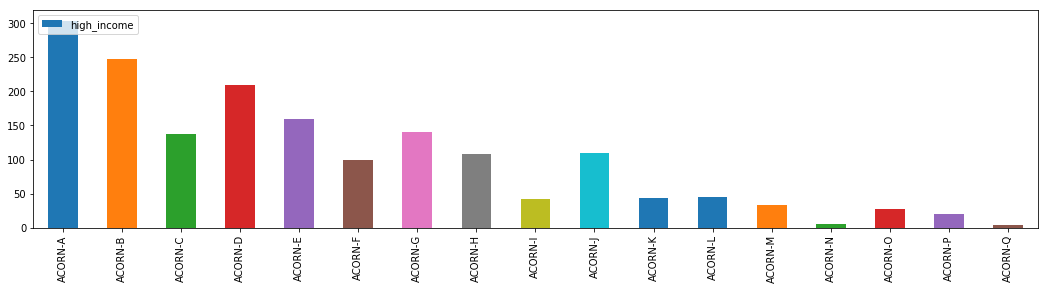

In [86]:
high_income.plot.bar(label='high_income')
plt.legend(loc='upper left')

In [89]:
#very_high_income.plot.bar(label='very_high_income')
#plt.legend(loc='upper left')

In [90]:
daily_all = pd.read_csv('{0}daily_all.csv'.format(PATH))

In [91]:
daily_all.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0,MAC000041,2011-12-08,0.2950,0.396259,1.071,27,0.285051,10.699,0.119
1,1,MAC000041,2011-12-09,0.2040,0.235437,0.744,48,0.184686,11.301,0.023
2,2,MAC000041,2011-12-10,0.1710,0.206854,1.038,48,0.198331,9.929,0.024
3,3,MAC000041,2011-12-11,0.1545,0.165333,0.381,48,0.102056,7.936,0.062
4,4,MAC000041,2011-12-12,0.1295,0.156250,0.330,48,0.099748,7.500,0.024


In [96]:
em = daily_all['energy_mean'].groupby(daily_all['LCLid']).describe()

In [98]:
ih = pd.read_csv('{0}informations_households.csv'.format(PATH))

In [99]:
ih.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [102]:
df = pd.merge(daily_all, ih, on='LCLid')

In [103]:
df.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,0,MAC000041,2011-12-08,0.2950,0.396259,1.071,27,0.285051,10.699,0.119,Std,ACORN-Q,Adversity,block_98
1,1,MAC000041,2011-12-09,0.2040,0.235437,0.744,48,0.184686,11.301,0.023,Std,ACORN-Q,Adversity,block_98
2,2,MAC000041,2011-12-10,0.1710,0.206854,1.038,48,0.198331,9.929,0.024,Std,ACORN-Q,Adversity,block_98
3,3,MAC000041,2011-12-11,0.1545,0.165333,0.381,48,0.102056,7.936,0.062,Std,ACORN-Q,Adversity,block_98
4,4,MAC000041,2011-12-12,0.1295,0.156250,0.330,48,0.099748,7.500,0.024,Std,ACORN-Q,Adversity,block_98


In [106]:
em_mac = df['energy_mean'].groupby(df['LCLid']).describe()

In [107]:
em_mac[:5]

,count,mean,std,min,25%,50%,75%,max
LCLid,,,,,,,,
MAC000002,505.0,0.254590,0.105414,0.094750,0.195437,0.233771,0.287750,1.387000
MAC000003,740.0,0.396809,0.241580,0.030250,0.242380,0.275521,0.471693,1.079979
MAC000004,662.0,0.035391,0.009033,0.000000,0.032042,0.034167,0.036792,0.153208
MAC000005,638.0,0.095363,0.030265,0.030375,0.080380,0.094146,0.110391,0.348083
MAC000006,761.0,0.059455,0.018305,0.000021,0.052687,0.060021,0.067979,0.138250


In [108]:
em_acorn = df['energy_mean'].groupby(df['Acorn']).describe()

In [109]:
em_acorn[:5]

,count,mean,std,min,25%,50%,75%,max
Acorn,,,,,,,,
ACORN-,781.0,0.251186,0.160004,0.088,0.149542,0.171604,0.374604,0.792479
ACORN-A,93083.0,0.398692,0.357344,0.000,0.193333,0.295292,0.465760,5.791125
ACORN-B,14465.0,0.248794,0.178143,0.000,0.119500,0.202750,0.330625,1.839667
ACORN-C,88674.0,0.249767,0.170433,0.000,0.130568,0.203208,0.326432,2.651000
ACORN-D,188969.0,0.283882,0.262218,0.000,0.122250,0.218854,0.357854,6.928250


In [112]:
em_acorn=em_acorn.reset_index()

In [115]:
em_acorn.head()

,Acorn,count,mean,std,min,25%,50%,75%,max
0,ACORN-,781.0,0.251186,0.160004,0.088,0.149542,0.171604,0.374604,0.792479
1,ACORN-A,93083.0,0.398692,0.357344,0.000,0.193333,0.295292,0.465760,5.791125
2,ACORN-B,14465.0,0.248794,0.178143,0.000,0.119500,0.202750,0.330625,1.839667
3,ACORN-C,88674.0,0.249767,0.170433,0.000,0.130568,0.203208,0.326432,2.651000
4,ACORN-D,188969.0,0.283882,0.262218,0.000,0.122250,0.218854,0.357854,6.928250


In [116]:
df1 = em_acorn[['Acorn','mean']]

In [120]:
df1.set_index("Acorn",drop=True,inplace=True)



Mean energy useage per day per household per Acorn

Acorn A and D are the biggest energy users on average

Thats not suprising for Acorn A and D - high income households - but Acorn B is also a hi group - why isnt energy useage as high as A & D?

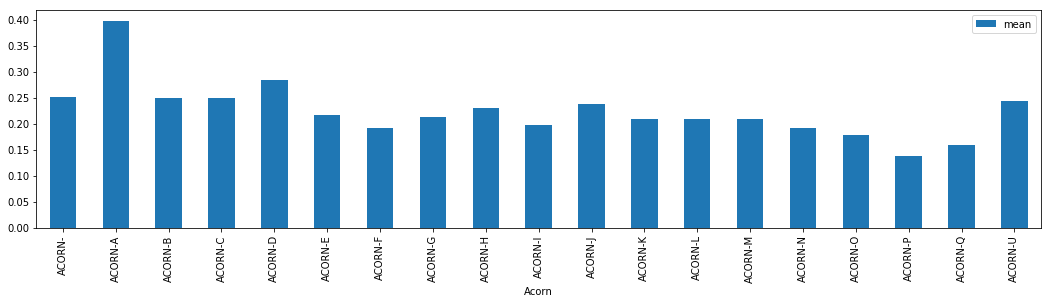

In [121]:
df1.plot.bar()